In [355]:
import os
import pandas as pd
from scipy import stats
import scipy
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Task A

In [321]:
nsw = pd.read_csv(r'microeconometrics-peisenha_integration_problem_set\datasets\processed\angrist_pischke\nswre74.csv')
nsw_a = nsw.drop(['re78', 'age2'], axis=1)
nsw_a.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75
0,1,37,11,1,0,1,1,0.00,0.00
1,1,22,9,0,1,0,1,0.00,0.00
2,1,30,12,1,0,0,0,0.00,0.00
3,1,27,11,1,0,0,1,0.00,0.00
4,1,33,8,1,0,0,1,0.00,0.00


In [322]:
cps1 = pd.read_stata(r'cps_controls.dta')
cps1_a = cps1.drop(['data_id', 're78'], axis=1)
cps1_a.head()

,treat,age,education,black,hispanic,married,nodegree,re74,re75
0,0.00,45.00,11.00,0.00,0.00,1.00,1.00,"21,516.67","25,243.55"
1,0.00,21.00,14.00,0.00,0.00,0.00,0.00,"3,175.97","5,852.56"
2,0.00,38.00,12.00,0.00,0.00,1.00,0.00,"23,039.02","25,130.76"
3,0.00,48.00,6.00,0.00,0.00,1.00,1.00,"24,994.37","25,243.55"
4,0.00,18.00,8.00,0.00,0.00,1.00,1.00,"1,669.30","10,727.61"


In [323]:
nsw_treat = nsw_a[(nsw_a['treat'] == 1)]
nsw_untreat = nsw_a[(nsw_a['treat'] == 0)]
nsw_t_m = nsw_treat.mean()
nsw_ut_m = nsw_untreat.mean()
ttest_nsw,pval_nsw = ttest_ind(nsw_treat, nsw_untreat)
cps1_m = cps1_a.mean()
ttest_nsw_cps,pval_nsw_cps = ttest_ind(nsw_treat, cps1_m)
data = np.column_stack((nsw_t_m,nsw_ut_m,pval_nsw,cps1_m,pval_nsw_cps))
dataset = pd.DataFrame({'Sample mean NSW treated': data[:, 0], 'Sample mean NSW control': data[:, 1], 'p-value on difference between NSW treated and NSW control means': data[:, 2], 'Sample mean CPS': data[:, 3], 'p-value on difference between NSW treated and CPS means': data[:, 4],})
pd.options.display.float_format = '{:,.2f}'.format
dataset = dataset.T
del dataset[0]
dataset = dataset.rename(columns={1: "Age", 2: "Education", 3:"Black", 4:"Hispanic", 5:"Married", 6:"No degree", 7:"Earnings74", 8:"Earnings75"})
dataset

,Age,Education,Black,Hispanic,Married,No degree,Earnings74,Earnings75
Sample mean NSW treated,25.82,10.35,0.84,0.06,0.19,0.71,"2,095.57","1,532.06"
Sample mean NSW control,25.05,10.09,0.83,0.11,0.15,0.83,"2,107.03","1,266.91"
p-value on difference between NSW treated and NSW control means,0.26,0.14,0.65,0.08,0.33,0.00,0.98,0.38
Sample mean CPS,33.23,12.03,0.07,0.07,0.71,0.30,"14,016.42","13,650.93"
p-value on difference between NSW treated and CPS means,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.18


# Task B.1

In [340]:
cps1_b = cps1.drop(['data_id'], axis=1)
cps1_b.rename(columns={'education': 'ed', 'nodegree': 'nodeg', 'hispanic': 'hisp'}, inplace=True)
cps1_b['age2'] = cps1_b['age']**2
nsw_b = nsw[(nsw['treat'] == 1)]
df = pd.concat([nsw_b, cps1_b])
df

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1.00,37.00,11.00,1.00,0.00,1.00,1.00,0.00,0.00,"9,930.05","1,369.00"
1,1.00,22.00,9.00,0.00,1.00,0.00,1.00,0.00,0.00,"3,595.89",484.00
2,1.00,30.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,"24,909.45",900.00
3,1.00,27.00,11.00,1.00,0.00,0.00,1.00,0.00,0.00,"7,506.15",729.00
4,1.00,33.00,8.00,1.00,0.00,0.00,1.00,0.00,0.00,289.79,"1,089.00"
...,...,...,...,...,...,...,...,...,...,...,...
15987,0.00,22.00,12.00,1.00,0.00,0.00,0.00,"3,975.35","6,801.44","2,757.44",484.00
15988,0.00,20.00,12.00,1.00,0.00,1.00,0.00,"1,445.94","11,832.24","6,895.07",400.00
15989,0.00,37.00,12.00,0.00,0.00,0.00,0.00,"1,733.95","1,559.37","4,221.87","1,369.00"
15990,0.00,47.00,9.00,0.00,0.00,1.00,1.00,"16,914.35","11,384.66","13,671.93","2,209.00"


# Task B.2

$$E[Y^1|D = 1, S] = E[Y^1|D = 0, S]$$
$$E[Y^0|D = 1, S] = E[Y^0|D = 0, S]$$

# Task B.3

In [445]:
Y = nsw['re78']
X = nsw.drop(['re78'], axis=1)
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print('Treatment estimate in experimental study is {:5.2f}'.format(result.params["treat"]))

Treatment estimate in experimental study is 1675.86


In [446]:
Y = df['re78']
X = df.drop(['re78'], axis=1)
X = sm.add_constant(X)
result1 = sm.OLS(Y,X).fit()
print('Treatment estimate in observational study is {:5.2f}'.format(result1.params["treat"]))

Treatment estimate in observational study is 792.81


# Task C.1

Data contains continuous variables; formed stratas might not have treated and control units available at the same time.

# Task C.2

In [437]:
pscore = smf.logit(formula='treat ~ age + ed + black + hisp + married + nodeg + re74 + re75', data=df).fit().predict()
pscore

Optimization terminated successfully.
         Current function value: 0.031035
         Iterations 12


array([2.47511138e-01, 7.25790910e-02, 2.50397953e-01, ...,
       3.29936780e-03, 2.40801355e-04, 5.22213745e-04])

# Task C.3

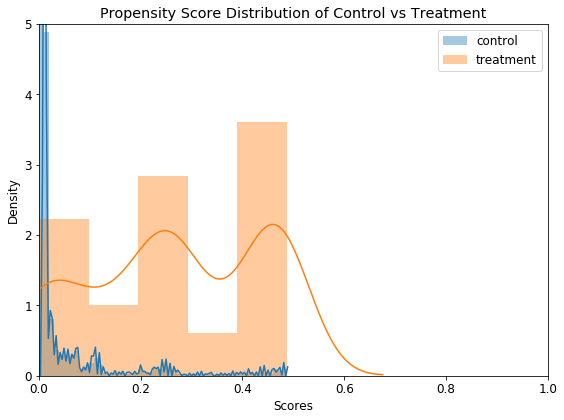

In [444]:
pscore_treat = pscore[df['treat'] == 1]
pscore_untreat = pscore[df['treat'] == 0]
sns.distplot(pscore_untreat, label='control')
sns.distplot(pscore_treat, label='treatment')
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.title('Propensity Score Distribution of Control vs Treatment')
plt.ylabel('Density')
plt.xlabel('Scores')
plt.legend()
plt.tight_layout()
plt.show()

# Task C.4

In [ ]:
def get_similar(pscore_treat: np.ndarray, pscore_untreat: np.ndarray, topn: int=5, n_jobs: int=1):
    from sklearn.neighbors import NearestNeighbors
    knn = NearestNeighbors(n_neighbors=topn + 1, metric='euclidean', n_jobs=n_jobs)
    knn.fit(pscore_untreat.reshape(-1, 1))
    distances, indices = knn.kneighbors(pscore_treat.reshape(-1, 1))
    sim_distances = distances[:, 1:]
    sim_indices = indices[:, 1:]
    return sim_distances, sim_indices

sim_distances, sim_indices = get_similar(pscore_treat, pscore_untreat, topn=1)

# Task C.5

In [447]:
df_treat = df[df['treat'] == 1]
df_untreat = df[df['treat'] == 0].iloc[sim_indices[:, 0]]
df_matched = pd.concat([df_treat, df_untreat])

Y = df_matched['re78']
X = df_matched['treat']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print('Treatment estimate after matching on propensity score is {:5.2f}'.format(result.params["treat"]))

Treatment estimate after matching on propensity score is 1554.52


C:\Users\liudm\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Regression model neglects important nonlinear terms and interactions (Rubin 1973). The benefit of matching over regression is that it is non-parametric (but you do have to assume that you have the right propensity score spesification in case of  matching).